In [ ]:
#Домашнє завдання №3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Напишіть функцію гіпотези лінійної регресії у векторному вигляді.

In [2]:
def hypothesis(X, w):
    return np.dot(X, w)

In [ ]:
#Створіть функцію для обчислення функції втрат у векторному вигляді.

In [3]:
def compute_loss(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    loss = np.sum((predictions - y)**2) / (2 * m)
    return loss

In [ ]:
#Реалізуйте один крок градієнтного спуску.

In [4]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w -= learning_rate * gradient
    return w

In [5]:
##Функція для багатокрокового градієнтного спуску в лінійній регресії.
def gradient_descent(X, y, w, learning_rate, num_iterations):
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {compute_loss(X, y, w)}')
    return w

In [ ]:
#Знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно 
#від площі, кількості ванних кімнат та кількості спалень.

In [6]:
df = pd.read_csv('Housing.csv')
df.replace('NaN', np.nan, inplace=True)
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
from sklearn.linear_model import LinearRegression

features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']
model = LinearRegression().fit(X, y)
print(f'Scikit-learn coeficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

Scikit-learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.60763263796


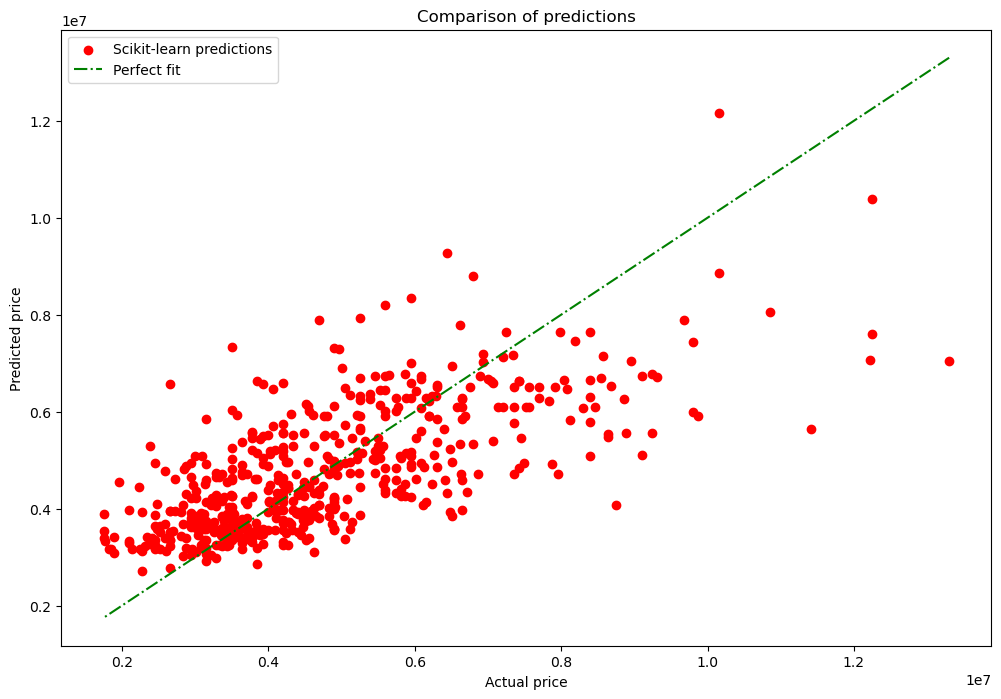

In [12]:
scikit_predictions = model.predict(X)

plt.figure(figsize=(12, 8))
plt.scatter(y, scikit_predictions, color='red', label='Scikit-learn predictions')
plt.plot(y, y, color='green', linestyle='-.', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

In [ ]:
#Знайдіть ці ж параметри за допомогою аналітичного рішення.

In [13]:
X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(f'Analitic learn coeficients: {w[1:]}')
print(f'Analitic learn intercept: {w[0]}')

Analitic learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Analitic learn intercept: -173171.6076326356


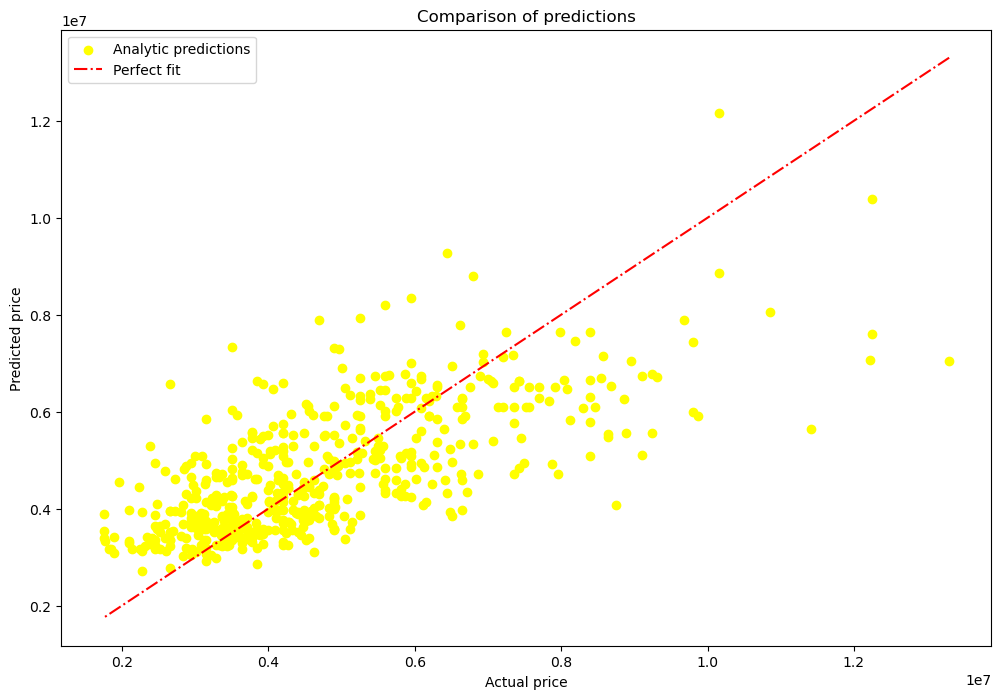

In [19]:
features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
analytic_predictions = np.dot(X, w)

plt.figure(figsize=(12, 8))
plt.scatter(y, analytic_predictions, color='yellow', label='Analytic predictions')
plt.plot(y, y, color='red', linestyle='-.', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

In [ ]:
#Порівняйте отримані результати.

Scikit-learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Scikit-learn intercept: -173171.60763263796
Analitic learn coeficients: [3.78762754e+02 4.06820034e+05 1.38604950e+06]
Analitic learn intercept: -173171.6076326356


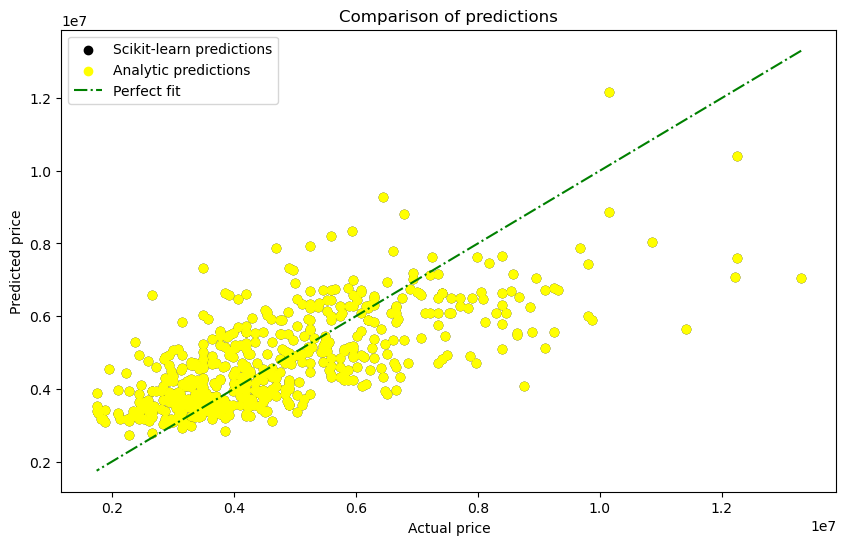

In [24]:
print(f'Scikit-learn coeficients: {model.coef_}')
print(f'Scikit-learn intercept: {model.intercept_}')

print(f'Analitic learn coeficients: {w[1:]}')
print(f'Analitic learn intercept: {w[0]}')


features = ['area', 'bedrooms', 'bathrooms']
X = df[features]
y = df['price']

scikit_predictions = model.predict(X)

X_ones = np.ones((X.shape[0], 1))
X = np.hstack((X_ones, X))
analytic_predictions = np.dot(X, w)

plt.figure(figsize=(10, 6))
plt.scatter(y, scikit_predictions, color='black', label='Scikit-learn predictions')
plt.scatter(y, analytic_predictions, color='yellow', label='Analytic predictions')
plt.plot(y, y, color='green', linestyle='-.', label='Perfect fit')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Comparison of predictions')
plt.legend()
plt.show()
